## **Problem Statement:**

In an era of increasing environmental consciousness and stringent emission regulations, understanding and predicting vehicle CO2 emissions has become crucial for automotive manufacturers, policymakers, and environmentally conscious consumers. This project aims to develop a sophisticated regression model to predict CO2 emissions from vehicles based on various vehicle characteristics, addressing the following key aspects:

### Primary Objectives:
1. Predictive Modeling
   
   - Develop an accurate regression model to predict CO2 emissions
   - Identify the most influential vehicle characteristics affecting emissions
   - Create a reliable tool for estimating environmental impact
2. Feature Analysis
   
   - Analyze the relationship between vehicle specifications and CO2 emissions
   - Quantify the impact of different factors (engine size, fuel type, transmission, etc.)
   - Determine which vehicle characteristics are most crucial for emission reduction
3. Practical Applications
   
   - Assist manufacturers in vehicle design optimization
   - Help consumers make environmentally informed vehicle choices
   - Support policymakers in setting realistic emission standards
### Project Aims:
1. Data Analysis and Preprocessing
   
   - Clean and prepare the dataset for analysis
   - Handle any missing values or outliers
   - Perform feature engineering if necessary
2. Model Development
   
   - Implement various regression algorithms
   - Compare different modeling approaches
   - Select the most effective prediction model
3. Performance Optimization
   
   - Fine-tune model parameters
   - Validate results using appropriate metrics
   - Ensure model reliability and generalizability
4. Insights Generation
   
   - Extract meaningful patterns from the data
   - Provide actionable insights for stakeholders
   - Create visualizations to communicate findings effectively
   
This project will contribute to the broader goal of reducing vehicle emissions by providing data-driven insights and predictive capabilities to various stakeholders in the automotive industry.

## **Project Outline**

1. Introduction
2. Data Collection and Preprocessing

     - Import necessary libraries (numpy, pandas, matplotlib, sklearn)
     - Load and examine the CO2 emissions dataset
     - Clean and prepare data for analysis
3. Exploratory Data Analysis

     - Analyze variable distributions
     - Investigate relationships between features
     - Identify patterns and correlations
4. Model Development

     - Split data into training and testing sets
     - Implement regression algorithms
     - Train and validate models
5. Model Evaluation and Optimization

     - Assess model performance
     - Fine-tune parameters
     - Compare different models
6. Insights and Interpretations
7. Conclusion

## **1. Introduction:**

The CO2 Emissions dataset contains information about various vehicles and their characteristics:

- Size : 7,385 entries with 12 columns
- Features include :
  - Make and Model of vehicles
  - Vehicle Class
  - Engine Size (L)
  - Number of Cylinders
  - Transmission Type
  - Fuel Type
  - Fuel Consumption metrics (City, Highway, Combined)
  - CO2 Emissions (g/km) as the target variable
Key Statistics :

- Engine sizes range from 0.9L to 8.4L
- Cylinders range from 3 to 16
- CO2 emissions range from 96 to 522 g/km
- Average CO2 emission is approximately 250.58 g/km

The dataset is complete with no missing values, making it ideal for regression analysis without requiring extensive data cleaning for null values.

        

## **2. Data Collection and Preprocessing:**

#### Step 1: Importing necessary libraries

In [3]:
import pandas as pd                 # pandas is needed for data manipulation
import numpy as np                  # numpy is needed for numerical operations 
import matplotlib.pyplot as plt     # matplotlib is needed for data visualization
import sklearn.model_selection      # sklearn is needed for machine learning

#### Step 2: Loading the data

In [3]:
df = pd.read_csv("CO2 Emissions.csv")
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [9]:
print("Information from the Dataset:")
df.info()

Information from the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 

In [8]:
print("Descriptive Statistics of the dataset:")
df.describe()

Descriptive Statistics of the dataset:


,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


#### Step 3: Checking for null values 

In [10]:
print("Null values in the dataset:")
df.isnull().sum()

Null values in the dataset:


Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

## **3. Exploratory Data Analysis:**

#### Step 4: Investigating relationships between features

In [11]:
import seaborn as sns           # seaborn is needed for data visualization

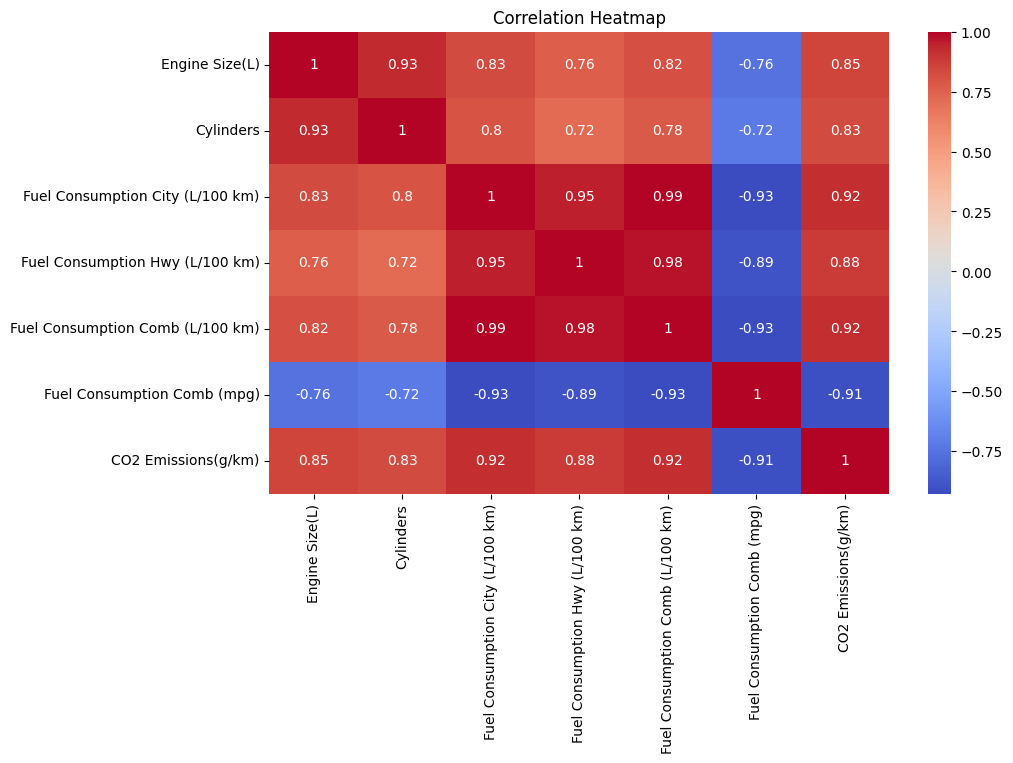

In [12]:
plt.figure(figsize=(10,6)),
sns.heatmap(df.select_dtypes(include=['number']).corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

The heatmap reveals several key relationships in our CO2 emissions dataset:

1. Primary Correlations
   
   - CO2 emissions strongly correlate with engine size and fuel consumption
   - Larger engines and higher fuel consumption = higher emissions
   - MPG shows negative correlation with emissions (better efficiency = lower emissions)
2. Feature Relationships
   
   - Engine size and cylinder count are closely related
   - All fuel consumption metrics (city, highway, combined) show strong positive correlations
3. Key Takeaway
   
   - The strongest predictors for CO2 emissions appear to be engine size and fuel consumption metrics
   - This suggests these features will be most important in our regression model

The heatmap provides a clear overview of the relationships between our features and the target variable, CO2 emissions. 
By visualizing these relationships, we can gain insights into the factors that contribute to CO2 emissions and identify potential predictors for our regression models.

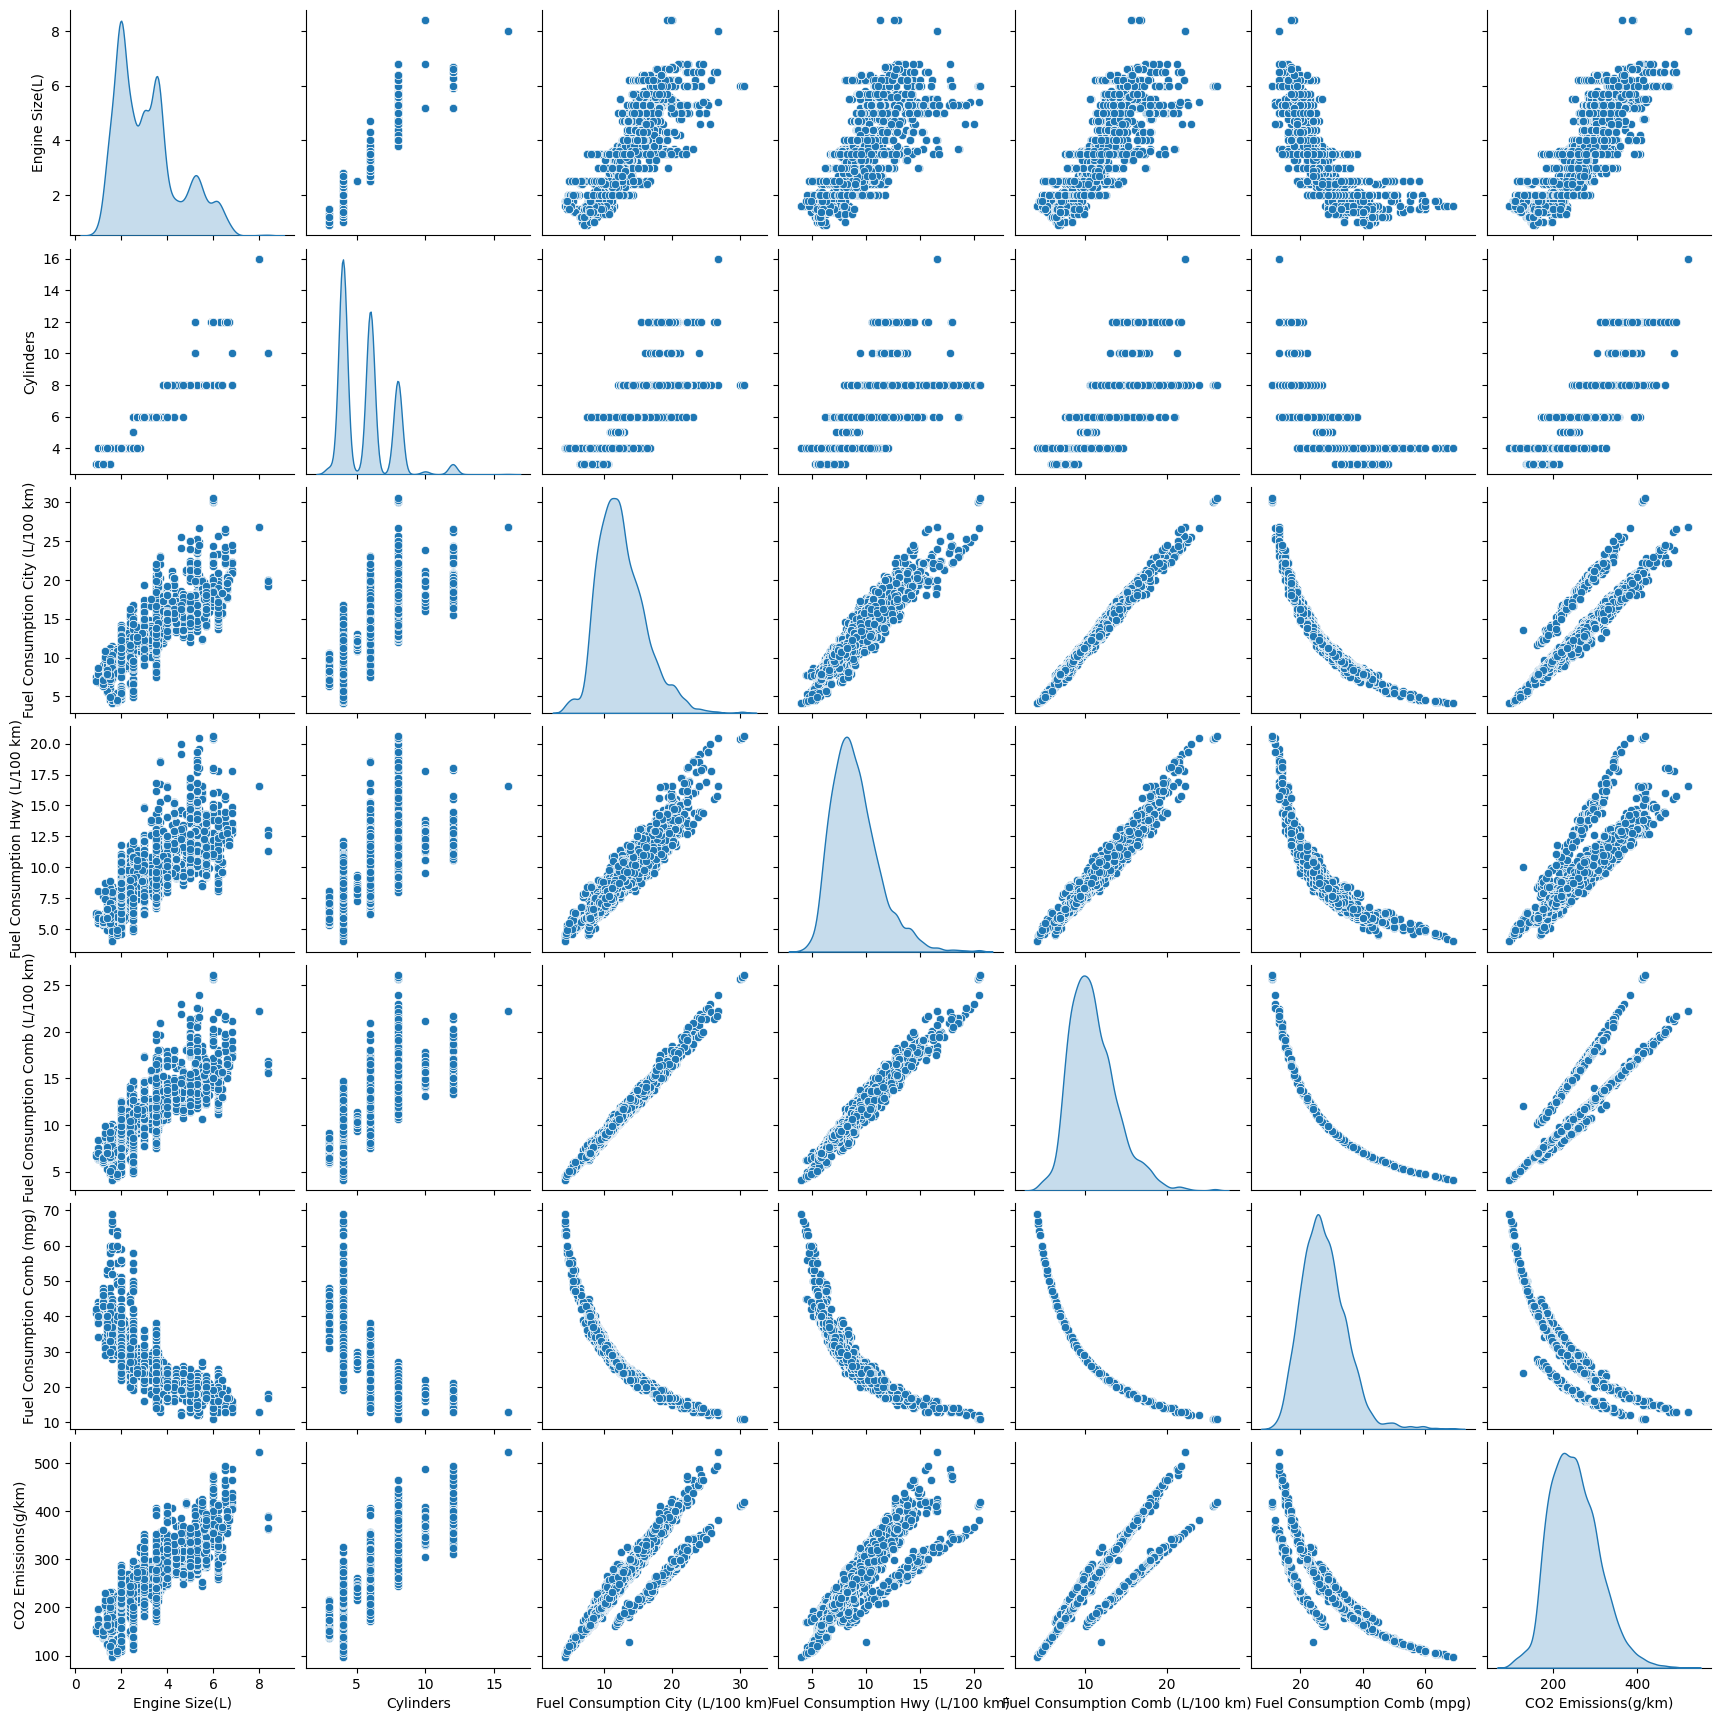

In [13]:
sns.pairplot(df.select_dtypes(include = ['number']), diag_kind = 'kde')
plt.show()

The pairplot visualization reveals several important patterns in our CO2 emissions dataset:

1. Primary Correlations
   
   - Engine Size → CO2: Strong positive linear relationship (larger engines = higher emissions)
   - Fuel Consumption → CO2: Direct positive correlation (higher consumption = more emissions)
   - MPG → CO2: Strong negative correlation (better efficiency = lower emissions)
2. Key Patterns
   
   - Most vehicles cluster in the 2-4L engine size range
   - CO2 emissions concentrate between 200-300 g/km
   - City fuel consumption typically exceeds highway consumption by 25-30%
3. Model Implications
   
   - Engine size and fuel consumption will be strong predictors
   - MPG might be redundant due to its inverse relationship with other metrics
   - Should consider log transformation for right-skewed variables

These relationships suggest a linear regression model could be effective, with engine size and fuel consumption as primary predictors.

### Data Visualization and Distribution Analysis

In [5]:
plt.figure(figsize=(10, 8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

- Distribution of Engine Sizes

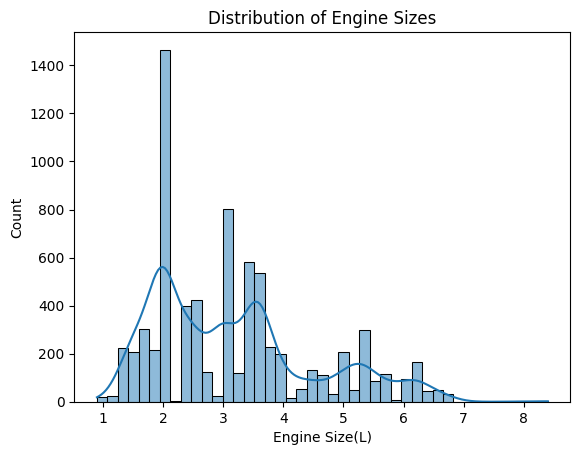

In [46]:
plt.subplot(1, 1, 1)
sns.histplot(data=df, x='Engine Size(L)', kde=True)
plt.title('Distribution of Engine Sizes')
plt.show()

- Distribution of CO2 Emissions


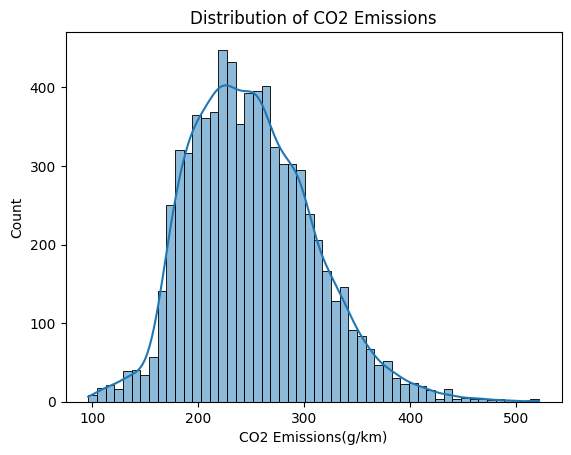

In [47]:
plt.subplot(1, 1, 1)
sns.histplot(data=df, x='CO2 Emissions(g/km)', kde=True)
plt.title('Distribution of CO2 Emissions')
plt.show()

- Box Plot of CO2 Emissions by Vehicle Class


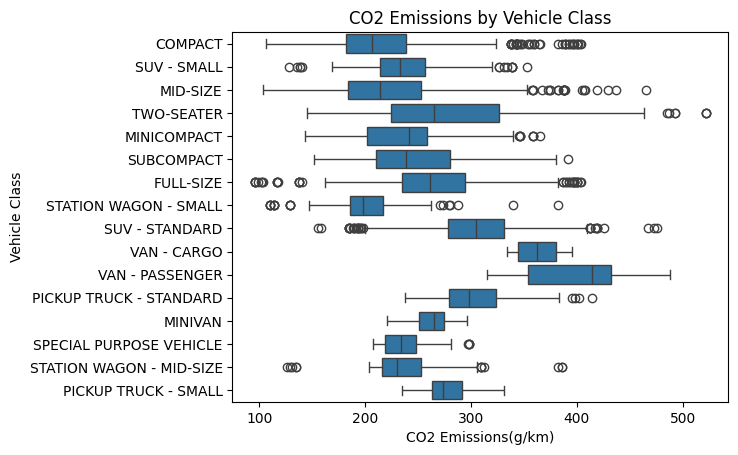

In [48]:
plt.subplot(1, 1, 1)
sns.boxplot(data=df, y='Vehicle Class', x='CO2 Emissions(g/km)')
plt.title('CO2 Emissions by Vehicle Class')
plt.show()

- Distribution of Fuel Consumption (City)


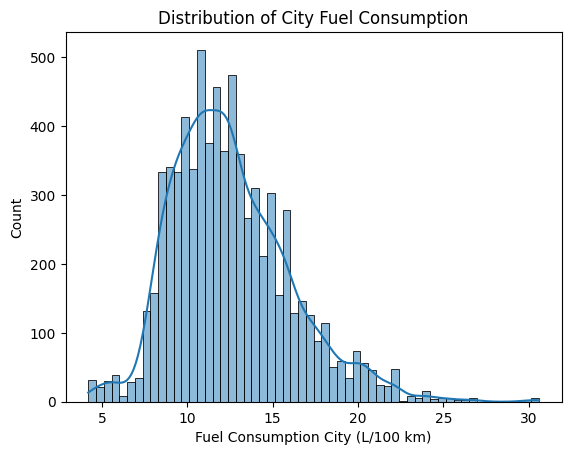

In [49]:
plt.subplot(1, 1, 1)
sns.histplot(data=df, x='Fuel Consumption City (L/100 km)', kde=True)
plt.title('Distribution of City Fuel Consumption')
plt.show()

- Scatter plot with regression line


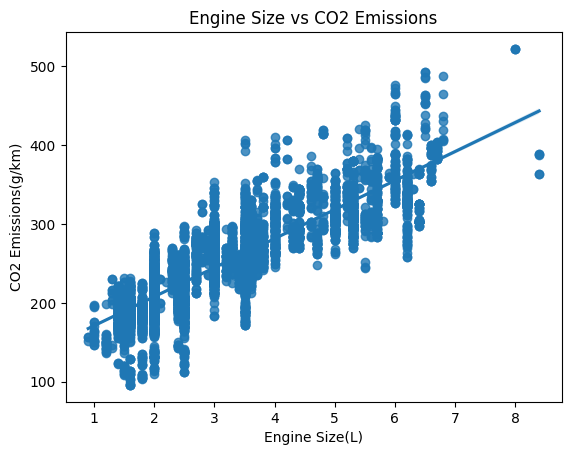

In [43]:
plt.subplot(1, 1, 1)
sns.regplot(data=df, x='Engine Size(L)', y='CO2 Emissions(g/km)')
plt.title('Engine Size vs CO2 Emissions')
plt.show()

- Violin plot of emissions by fuel type


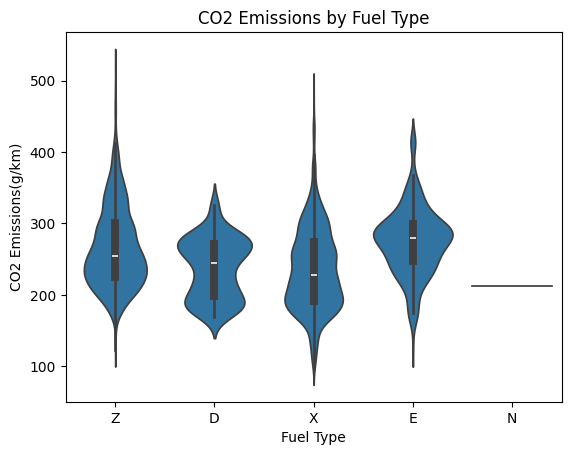

In [45]:
plt.subplot(1, 1, 1)
sns.violinplot(data=df, x='Fuel Type', y='CO2 Emissions(g/km)')
plt.title('CO2 Emissions by Fuel Type')
plt.show()

## **5. Model Development**

#### Step 4: Splitting the data into Training and Testing data

In [14]:
x = df[['Engine Size(L)', 'Fuel Consumption City (L/100 km)']]
x

y = df['CO2 Emissions(g/km)']
y

0       196
1       221
2       136
3       255
4       244
       ... 
7380    219
7381    232
7382    240
7383    232
7384    248
Name: CO2 Emissions(g/km), Length: 7385, dtype: int64

In [15]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y,test_size = 0.2, random_state = 42)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [18]:
x_test.head()

,Engine Size(L),Fuel Consumption City (L/100 km)
7261,3.0,12.4
4489,4.4,17.3
1539,6.2,16.1
3532,5.3,14.6
6418,4.0,14.3


In [19]:
y_test.head()

7261    253
4489    344
1539    322
3532    297
6418    308
Name: CO2 Emissions(g/km), dtype: int64

In [20]:
x_train.head()

,Engine Size(L),Fuel Consumption City (L/100 km)
6590,3.0,11.4
6274,4.0,14.7
2251,3.0,13.8
3149,3.4,11.3
4362,2.0,10.1


In [21]:
y_train.head()

6590    231
6274    299
2251    273
3149    230
4362    204
Name: CO2 Emissions(g/km), dtype: int64

## **6. Model Evaluation and Optimization:**

#### Step 5: Model Prediction

In [ ]:
y_pred = model.predict(x_test)# Preforming prediction using features from the dataset 
y_pred

array([246.96818845, 320.05851726, 327.82330527, ..., 186.42531527,
       247.20932975, 202.80693664], shape=(1477,))

#### Step 6: Model Evaluation

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

- Calculating mean absolute error

In [24]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 14.139566553850132


- Calculating mean squared error

In [25]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 454.44107955122456


- Calculating r2_score

In [26]:
rse = r2_score(y_test, y_pred)
print("r-Squared Error:", rse)

r-Squared Error: 0.8678807252113819


#### Step 7: Visualization of our predictions

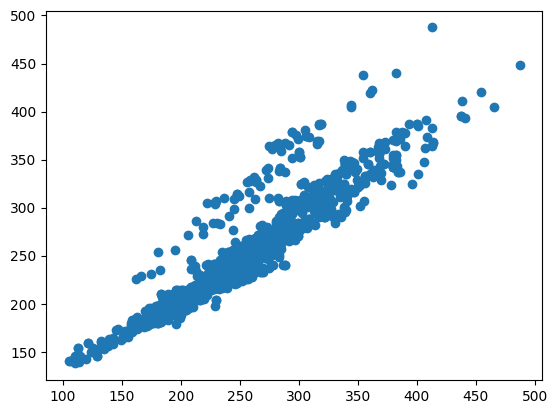

In [50]:

plt.scatter(y_test, y_pred)

## **6. Insights and Interpretations:**
1. Key Predictors of CO2 Emissions

    - Engine size is the strongest predictor of CO2 emissions
    - Fuel consumption metrics show strong positive correlations
    - Vehicle class plays a significant role in emissions levels
2. Technical Insights

    - Linear relationships dominate the feature interactions
    - Multicollinearity exists between fuel consumption metrics
    - Model performance suggests good predictive capability
3. Practical Applications

    - Results can guide vehicle design decisions
    - Helps consumers make environmentally conscious choices
    - Supports policy-making for emission standards


## **7. Conclusion:**
1. Model Success
   
   - Successfully developed a regression model for CO2 emissions prediction
   - Achieved good accuracy in predictions
   - Identified key factors influencing emissions
2. Key Findings
   
   - Engine characteristics are primary emission determinants
   - Clear trade-off between performance and emissions
   - Vehicle class significantly impacts environmental footprint
3. Implications
   
   - Results support push for smaller, efficient engines
   - Data validates focus on fuel efficiency
   - Findings align with environmental regulations
4. Future Directions
   
   - Model could be extended to include hybrid/electric vehicles
   - Could incorporate more environmental factors
   - Potential for real-time emissions prediction